# Supplemental Material

Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support

Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
January 16, 2025

This file contains the supplemental materials for *Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support*. It includes a transparency report and all supplemental figures and tables. Additional materials are made available on our study’s OSF page (<https://osf.io/xta67/>).

------------------------------------------------------------------------

In [ ]:
#| echo: false

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))
suppressPackageStartupMessages(library(tidyposterior))
suppressPackageStartupMessages(library(kableExtra))
library(patchwork)


theme_set(theme_classic())

options(knitr.kable.NA = '')

path_models_lag <- format_path(str_c("studydata/risk/models/lag"))
path_processed <- format_path(str_c("studydata/risk/data_processed/lag"))

In [ ]:
#| echo: false

pp_tidy <- read_csv(here::here(path_models_lag, "pp_tidy.csv"), 
                                 show_col_types = FALSE) 

ci <- read_csv(here::here(path_models_lag, "test_metrics_all_pp_perf.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(model = factor(model, levels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks")))

pp_dem <- read_csv(here::here(path_models_lag, "pp_dem_all.csv"), 
                                 show_col_types = FALSE)

pp_dem_contrast <- read_csv(here::here(path_models_lag, "pp_dem_contrast_all.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(lag = factor(lag, levels = c("0", "24", "72", "168", "336"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks")))

## Transparency Report 1.0 (full, 36 items; Aczel et al., 2019)

**Manuscript Title:** Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support  
**Authors:** Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
**Corresponding author’s email address:** jjcurtin@wisc.edu  
**Link to Project Repository:** <https://osf.io/xta67/>

### Preregistration Section

-   Prior to analyzing the complete data set, a time-stamped preregistration was posted in an independent, third-party registry for the data analysis plan: Yes

Comments about your Preregistration: We pre-registered our data analytic strategy on OSF.

### Methods Section

The manuscript fully describes…

-   the rationale for the sample size used (e.g., an a priori power analysis): Yes  
-   how participants were recruited: Yes  
-   how participants were selected (e.g., eligibility criteria): Yes  
-   what compensation was offered for participation: Yes  
-   how participant dropout was handled (e.g., replaced, omitted, etc): Yes  
-   how participants were assigned to conditions: N/A. There are no conditions.  
-   how stimulus materials were randomized: N/A.  
-   whether (and, if so, how) participants, experimenters, and data-analysts were kept naive to potentially biasing information: N/A. This is an observations study that does not include analysis of group or manipulations. There were no study conditions to blind.  
-   the study design, procedures, and materials to allow independent replication: Yes  
-   the measures of interest (e.g., friendliness): Yes  
-   all operationalizations for the measures of interest (e.g., a questionnaire measuring friendliness): Yes

### Results and Discussion Section

The manuscript…

-   distinguishes explicitly between “confirmatory” (i.e., prespecified) and “exploratory” (i.e., not prespecified) analyses: All analyses were pre-registered.
-   describes how violations of statistical assumptions were handled: No  
-   justifies all statistical choices (e.g., including or excluding covariates; applying or not applying transformations; use of multi-level models vs. ANOVA): Yes  
-   reports the sample size for each cell of the design: Yes  
-   reports how incomplete or missing data were handled: Yes  
-   presents protocols for data preprocessing (e.g., cleaning, discarding of cases and items, normalizing, smoothing, artifact correction): Yes

### Data, Code, and Materials Availability Section

The following have been made publicly available…

-   the (processed) data, on which the analyses of the manuscript were based: Yes  
-   all code and software (that is not copyright protected): Yes  
-   all instructions, stimuli, and test materials (that are not copyright protected): Yes  
-   Are the data properly archived (i.e., would a graduate student with relevant background knowledge be able to identify each variable and reproduce the analysis): Yes  
-   The manuscript includes a statement concerning the availability and location of all research items, including data, materials, and code relevant to the study: Yes

## Supplemental Figures

### Figure S1: Full Posterior Distributions for auROC by Model

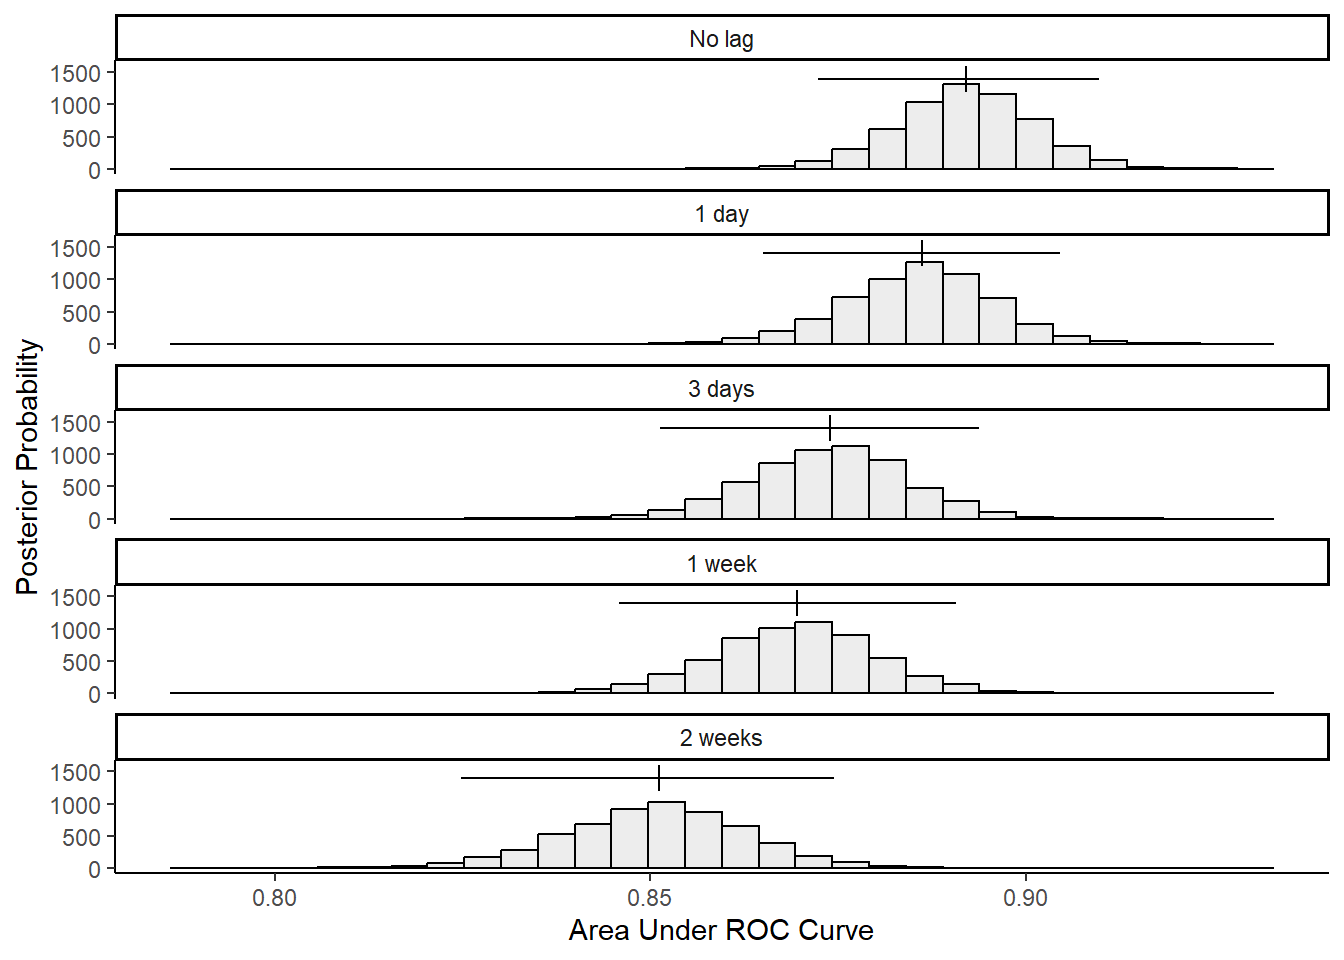

In [ ]:
#| echo: false
pp_tidy |> 
  mutate(model = factor(model, levels = c("lag0", "lag24", "lag72", "lag168", "lag336"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks"))) |>
  ggplot() + 
  geom_histogram(aes(x = posterior), fill = "light grey", color = "black", alpha = .4, 
                 bins = 30) +
  geom_segment(mapping = aes(y = 1200, yend = 1600, x = pp_median, xend = pp_median),
               data = ci) +
  geom_segment(mapping = aes(y = 1400, yend = 1400, x = pp_lower, xend = pp_upper),
                data = ci) +
  facet_wrap(~model, ncol = 1) +
  scale_y_continuous("Posterior Probability", breaks = c(0, 500, 1000, 1500)) +
  xlab("Area Under ROC Curve") +
  theme_classic() +
  theme(legend.position = "none")

### Figure S2: Global Shapley Plot for All Models

In [ ]:
global_all <- read_rds(here::here(path_models_lag, "shap_global_all.rds")) |> 
   filter(str_detect(variable_grp, "EMA")) |> 
   mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
          variable_grp = reorder(variable_grp, mean_value, sum),
          model = factor(model, levels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag"),
                         labels = c("2 weeks", "1 week", "3 days", "1 day", "No lag" )))

shap_levels <- global_all |>
  mutate(variable_grp = reorder(variable_grp, mean_value, sum)) |>
  pull(variable_grp) |>
  levels()

In [ ]:
color_codes <- c("#240e31","#75f3d3", "#458892", "#751c6d", "#cb6bce")

panel_shap_global <- global_all |>
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, fill = model), stat = "identity") +
  ylab("Mean(|Shapley Value|)") +
  xlab("") +
  labs(fill = "Model Lag") +
  scale_color_manual(values = color_codes) +
  scale_fill_manual(values = color_codes) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        legend.position = "right") +
  coord_flip()

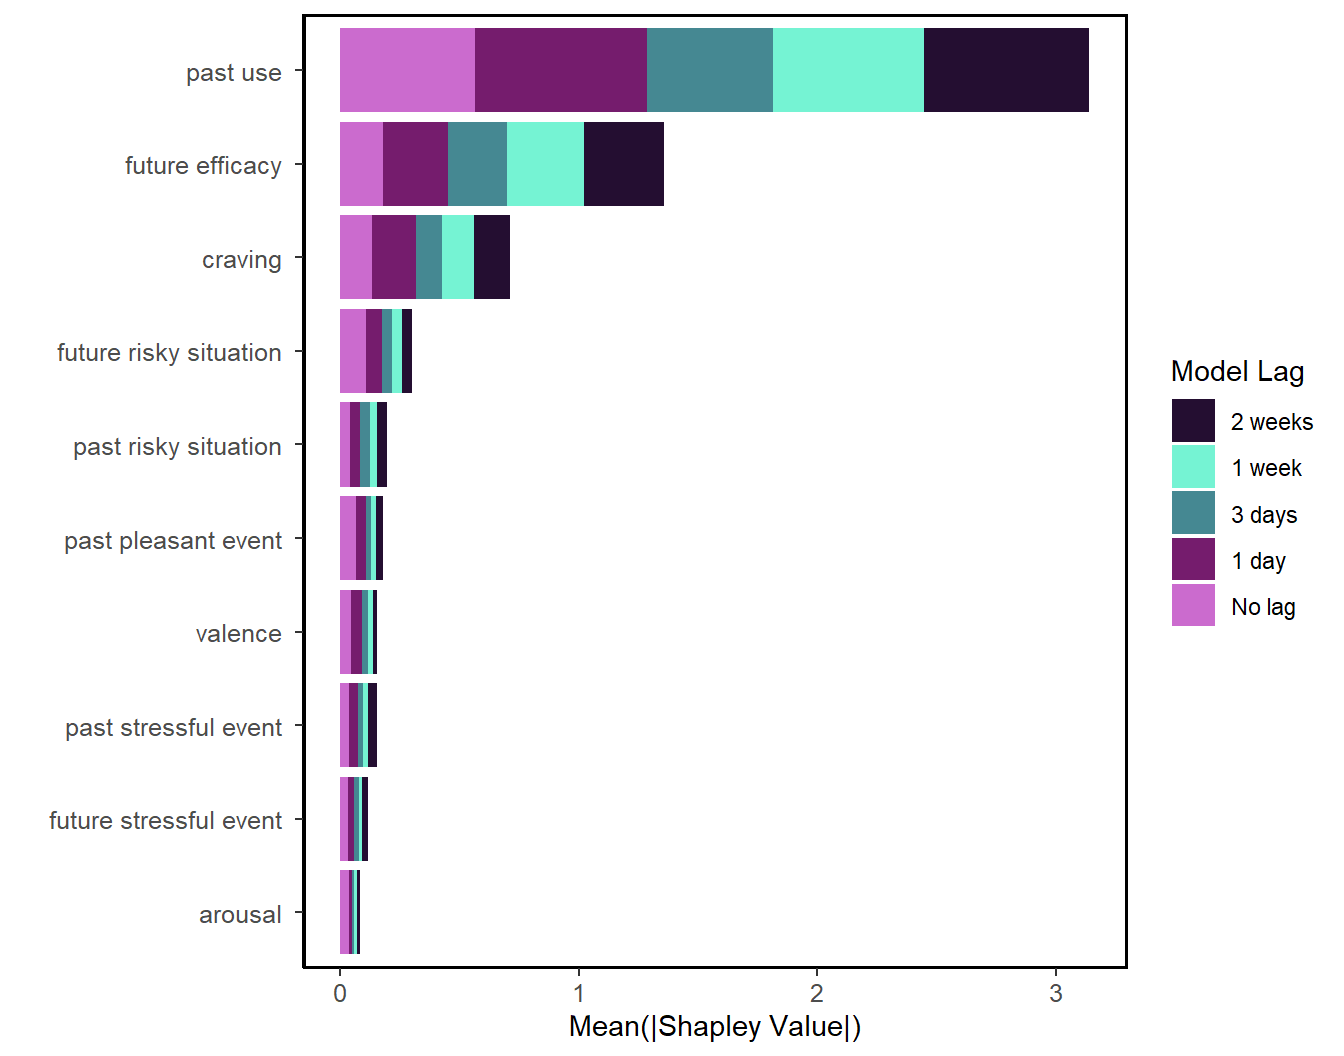

In [ ]:
#| label: fig-shap
#| fig-cap: "Global importance (mean |Shapley value|) for feature categories for each model. Feature categories are ordered by their aggregate global importance (i.e., total bar length) across the five models. The importance of each feature category for specific models is displayed separately by color."
#| fig-height: 5.5
#| fig-width: 7

panel_shap_global

### Figure S3: Global Shapley Plots for Baseline and 2-Week Lag Model by Demographic Group

In [ ]:
feat <- read_csv(here::here(path_processed, 
                            "1week_window/features_0lag_v1.csv.xz"),
                 col_types = cols()) |> 
  select(label_num, subid, dttm_label, lapse, demo_age, demo_sex, 
         demo_income, demo_race) |> 
  arrange(label_num) 

shaps <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_0_v1_nested_main.rds"))

In [ ]:
global_feat_0 <- feat |> 
  rename(id_obs = label_num) |>
  right_join(shaps, by = c("id_obs")) 

In [ ]:
baseline_sex <- global_feat_0 |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         group = if_else(demo_sex == "Male", 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)")),
         model = "No Lag") |> 
  group_by(model, group, variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  facet_wrap(~model, strip.position = "left") +
  labs(title = "Sex at Birth",
       y = NULL,
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        strip.placement = "outside") +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

In [ ]:
baseline_race <- global_feat_0 |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         group = if_else(demo_race == "White/Caucasian", 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)"))) |> 
  group_by(group, variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  labs(title = "Race/Ethnicity",
       y = "Mean(|Shapley Value|)",
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        axis.text.y = element_blank(),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

In [ ]:
baseline_income <- global_feat_0 |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         group = if_else(demo_income >= 1560, 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)"))) |> 
  group_by(group, variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  labs(title = "Income",
       y = NULL,
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        axis.text.y = element_blank(),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

In [ ]:
no_lag <- baseline_sex + baseline_race + baseline_income 

In [ ]:
feat_336 <- read_csv(here::here(path_processed, 
                            "1week_window/features_336lag_v1.csv.xz"),
                 col_types = cols()) |> 
  select(label_num, subid, dttm_label, lapse, demo_age, demo_sex, 
         demo_income, demo_race) |> 
  arrange(label_num) 

shaps_336 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_336_v1_nested_main.rds"))

In [ ]:
global_feat_336 <- feat_336 |> 
  rename(id_obs = label_num) |>
  right_join(shaps_336, by = c("id_obs")) |> 
  filter(model == "336 lag")

In [ ]:
twoweek_sex <- global_feat_336 |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         group = if_else(demo_sex == "Male", 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)")),
         model = "2-Week Lag") |> 
  group_by(model, group, variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  facet_wrap(~model, strip.position = "left") +
  labs(title = "Sex at Birth",
       y = NULL,
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        strip.placement = "outside") +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

In [ ]:
twoweek_race <- global_feat_336 |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         group = if_else(demo_race == "White/Caucasian", 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)"))) |> 
  group_by(group, variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  labs(title = "Race/Ethnicity",
       y = "Mean(|Shapley Value|)",
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        axis.text.y = element_blank(),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

In [ ]:
twoweek_income <- global_feat_336 |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         group = if_else(demo_income >= 1560, 
                         "advantaged group (non-Hispanic White, male, above poverty)",
                         "disadvantaged group (not White, female, below poverty)",
                         ),
         group = factor(group, levels = c("disadvantaged group (not White, female, below poverty)",
                                          "advantaged group (non-Hispanic White, male, above poverty)"))) |> 
  group_by(group, variable_grp) |> 
  summarize(mean_value = mean(abs(shapley_value)), .groups = "drop") |> 
  arrange(mean_value) |> 
  mutate(variable_grp = factor(variable_grp),
         variable_grp = fct_inorder(variable_grp)) |> 
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, group = group, 
                 fill = group),  
             stat = "identity", position = "dodge") +
  labs(title = "Income",
       y = NULL,
       x = NULL,
       color = NULL) +
  theme(axis.text=element_text(size=9.5),
        axis.text.y = element_blank(),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_fill_manual(values = c("#cb6bce", "#240e31")) +
  coord_flip()

In [ ]:
twoweek_lag <- twoweek_sex + twoweek_race + twoweek_income  + 
  plot_layout(guides = "collect") &
  theme(legend.position = "bottom", legend.direction = "vertical") 

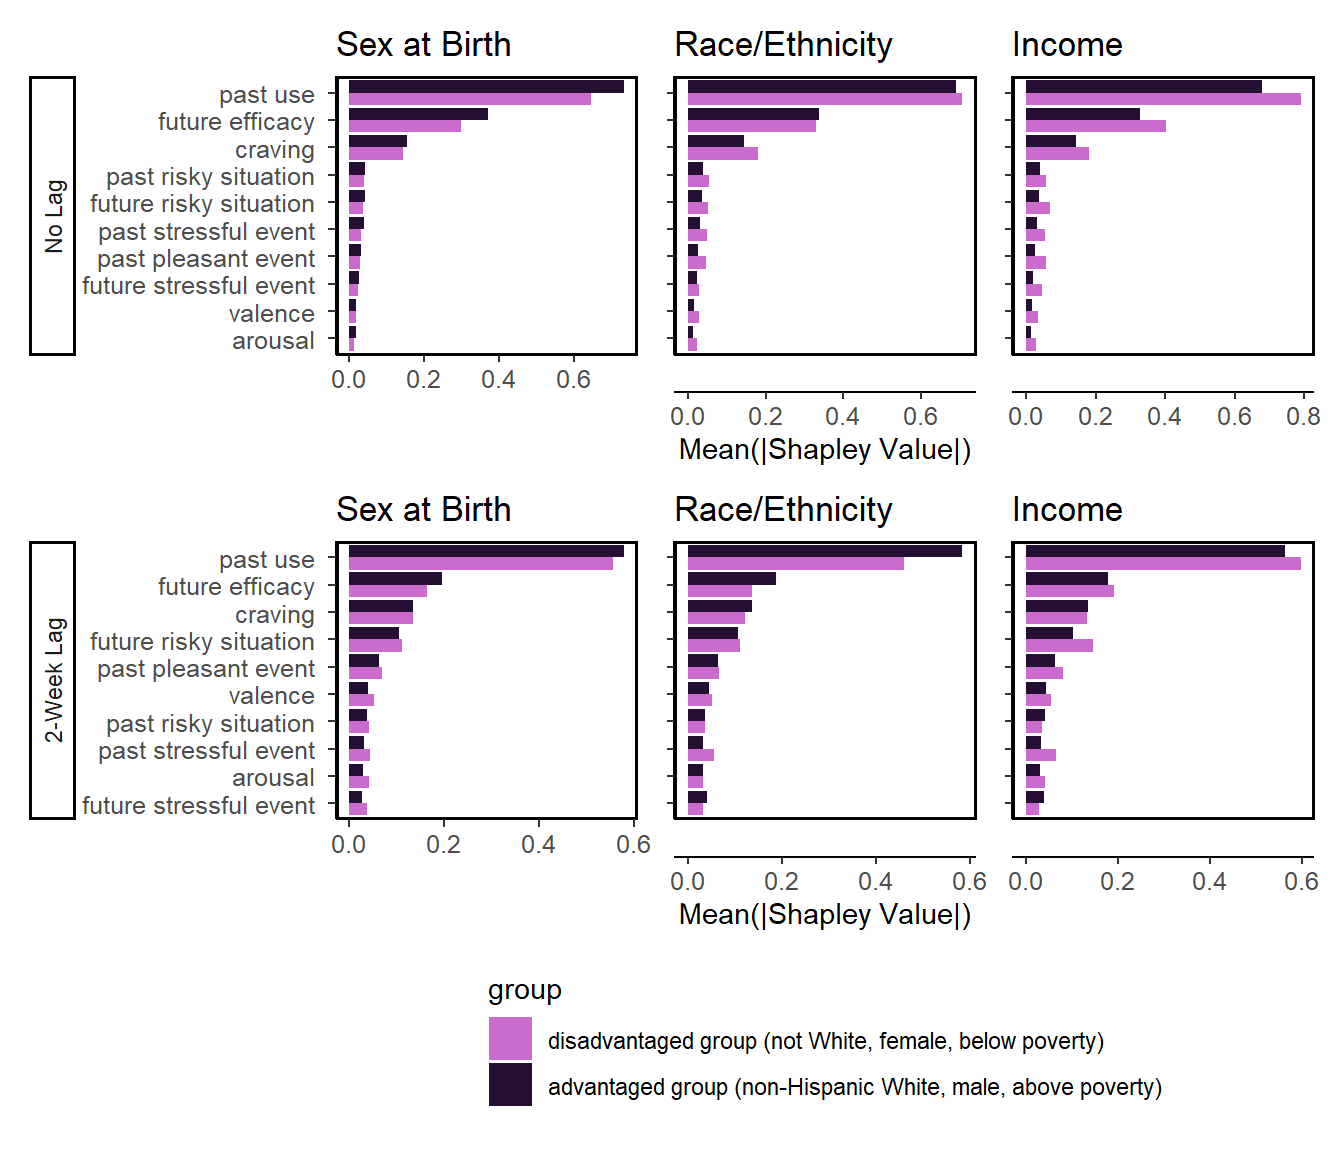

In [ ]:
#| label: fig-dem
#| fig-cap: "Global importance (mean |Shapley value|) for feature categories for no lag and two week lag model by demographic group. The importance of each feature category for advantaged and disadvantaged demographic groups are displayed separately by color."
#| fig-height: 6
#| fig-width: 7

no_lag/twoweek_lag 

### Figure S4: Local Shapley Plots by Model

In [ ]:
#| echo: false

shap_feat_0 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_0_v1_nested_main_downsized.rds")) |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         variable_grp = factor(variable_grp, levels = shap_levels))
  
shap_feat_24 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_24_v1_nested_main_downsized.rds")) |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         variable_grp = factor(variable_grp, levels = shap_levels))

shap_feat_72 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_72_v1_nested_main_downsized.rds")) |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         variable_grp = factor(variable_grp, levels = shap_levels))

shap_feat_168 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_168_v1_nested_main_downsized.rds")) |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         variable_grp = factor(variable_grp, levels = shap_levels))

shap_feat_336 <- read_rds(here::here(path_models_lag, "outer_shapsgrp_1week_336_v1_nested_main_downsized.rds")) |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         variable_grp = factor(variable_grp, levels = shap_levels))

In [ ]:
#| echo: false

panel_shap_local_0 <- shap_feat_0 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (0 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#cb6bce"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_24 <- shap_feat_24 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (24 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#922488"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_72 <- shap_feat_72 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (72 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#458892"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

panel_shap_local_168 <- shap_feat_168 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (168 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#75f3d3"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()


panel_shap_local_336 <- shap_feat_336 |>
  ggplot(mapping = aes(x = variable_grp, y = shapley_value, 
                       color = feature_value)) +
  ggforce::geom_sina(method = "counts", maxwidth = .7, alpha = .4) +
  geom_hline(yintercept = 0) +
  scale_y_continuous(limits = c(-2, 5), breaks = seq(-2, 5)) +
  ylab("Shapley Value (336 Hour Lag)") +
  xlab(NULL) +
  scale_color_gradientn(colors = c("#240e31", "#f9e79f"),
                        breaks = c(.1, .9),
                        labels = c("low", "high")) +
  labs(color = NULL) +
  theme(legend.position = "right",
        legend.key.size = unit(0.25, "cm"),
        axis.text=element_text(size=9.5),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1))+
  coord_flip()

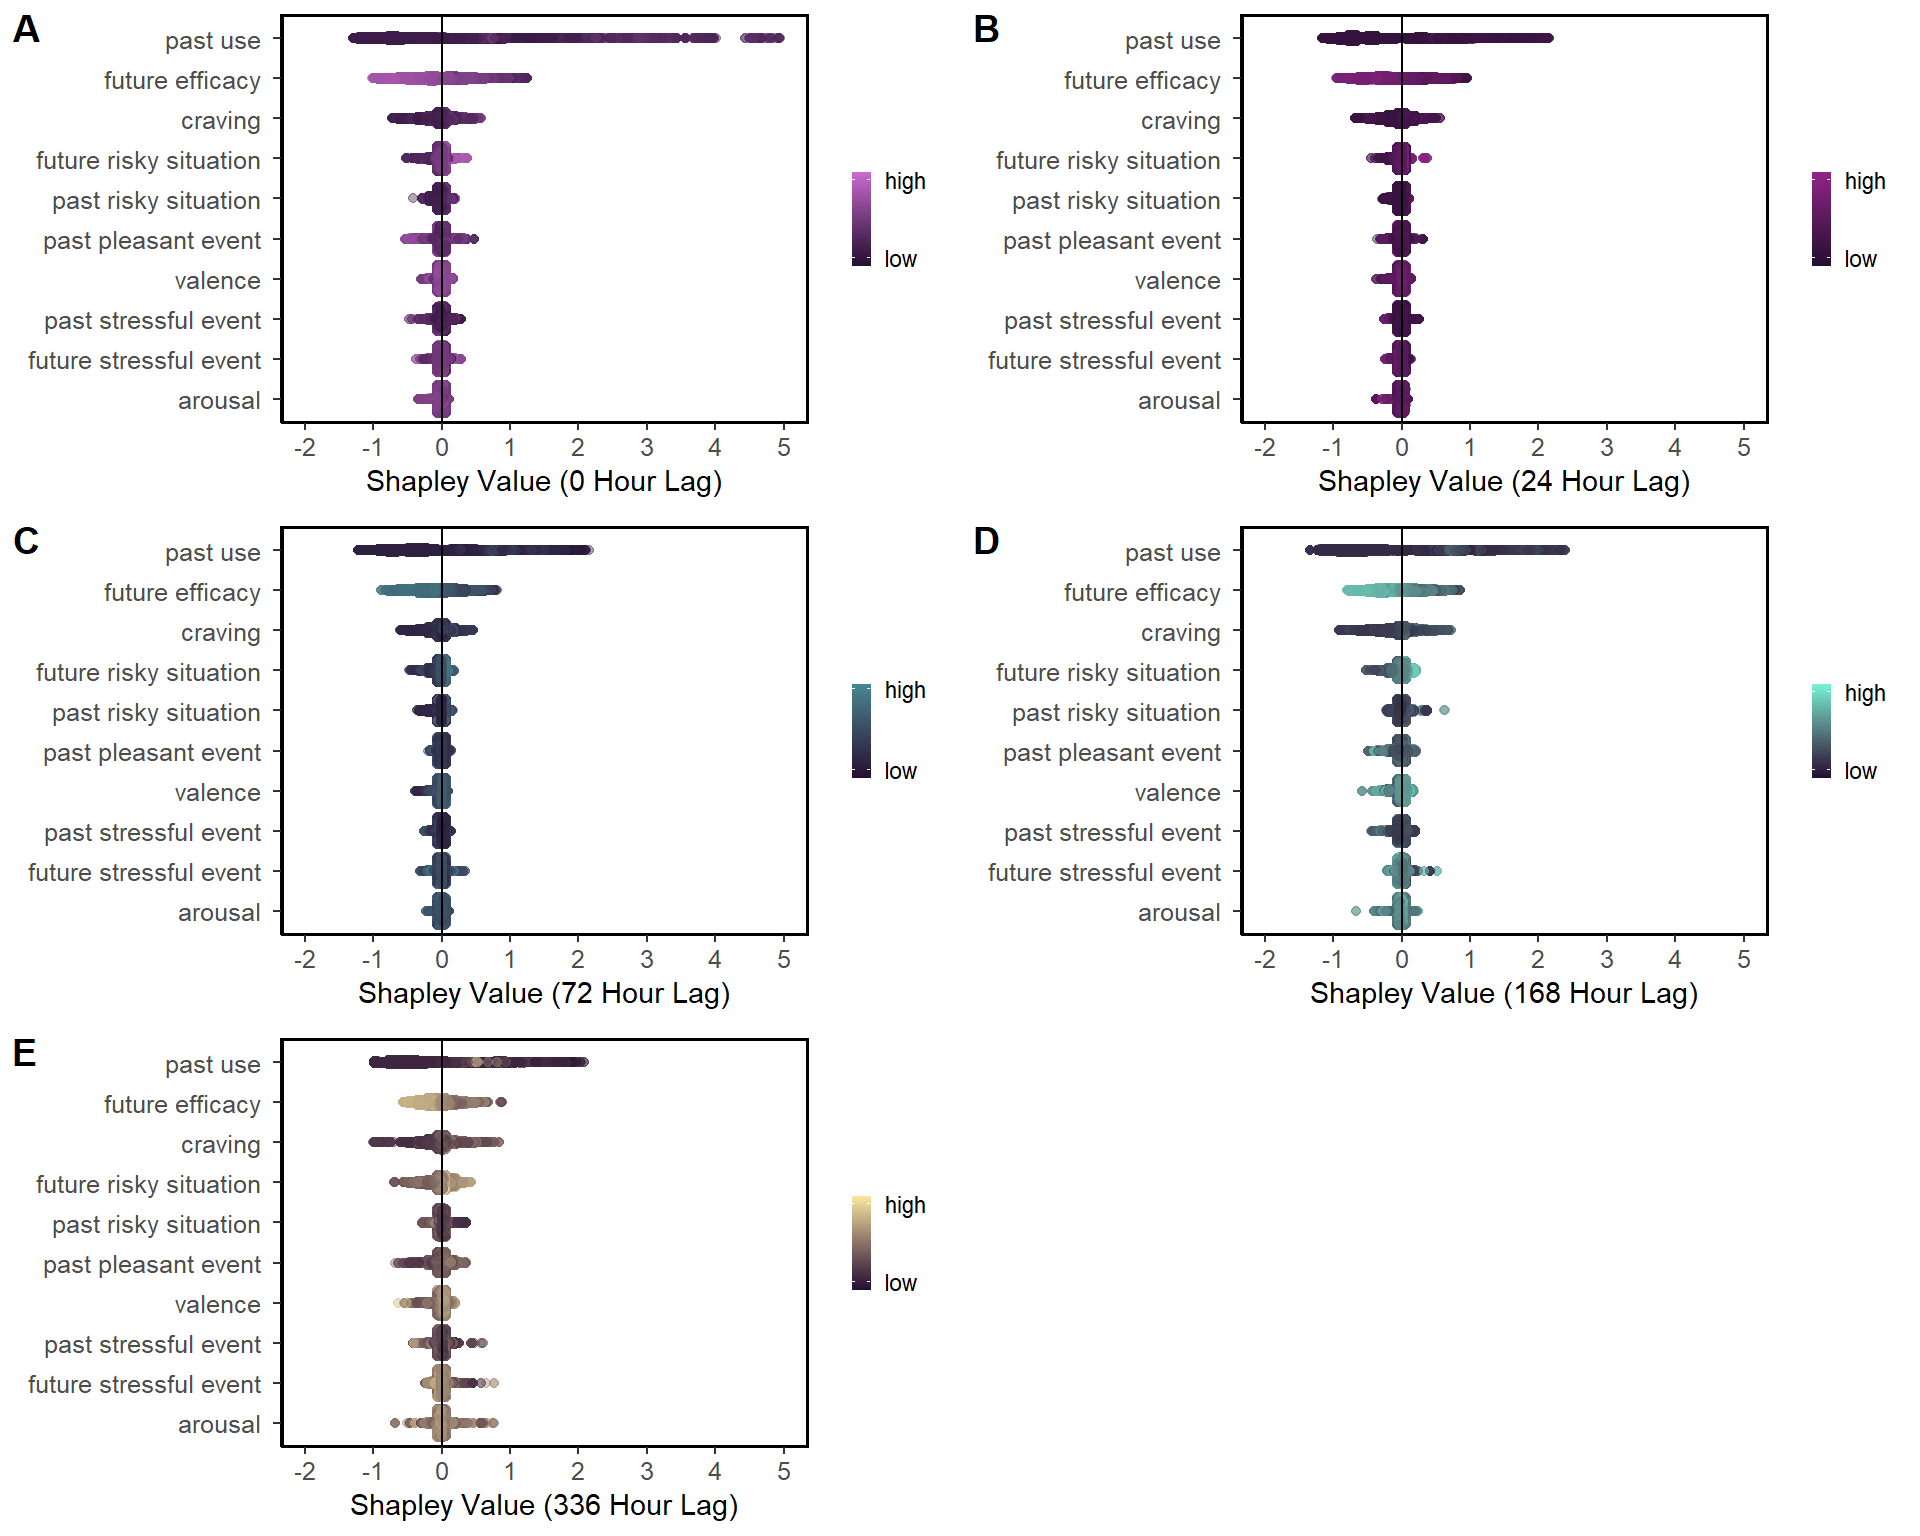

In [ ]:
#| label: fig-shap-local
#| fig-cap: "Local feature importance plots by model."
#| fig-height: 8
#| fig-width: 10

cowplot::plot_grid(panel_shap_local_0,
                   panel_shap_local_24,
                   panel_shap_local_72, 
                   panel_shap_local_168,
                   panel_shap_local_336, 
                   ncol = 2, labels = c("A", "B", "C", "D", "E"), 
                   align = "hv")

## Supplemental Tables

### Table S1: Demographic Contrasts for all Models

In [ ]:
#| label: tbl-fairness
#| tbl-cap: "This table reports the bayesian model contrasts for each demographic group comparison separately by model and contrast. The median value represents the difference in median area under the ROC curve (auROC) between the two groups. A negative value indicates lower auROC performance for the disadvantaged group (female, not White, income below poverty) compared to the advantaged group (male, White, income above poverty)."

pp_sex <- pp_dem_contrast |> 
  filter(contrast == "female vs male") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag`= lag,
         Median = median,
         `Bayesian CI` = ci,
         Probability = probability)

pp_income <- pp_dem_contrast |> 
  filter(contrast == "below poverty vs above poverty") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag`= lag,
         `Median ` = median,
         `Bayesian CI ` = ci,
         `Probability ` = probability)

pp_race <- pp_dem_contrast |> 
  filter(contrast == "not white vs non-hispanic white") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag`= lag,
         `Median  ` = median,
         `Bayesian CI  ` = ci,
         `Probability   ` = probability)

pp_sex |> 
  full_join(pp_income, by = "Lag") |> 
  full_join(pp_race, by = "Lag") |> 
  kbl() |> 
  add_header_above(c(" " = 1, "Race" = 3, "Sex" = 3, "Income" = 3))